In [1]:
from chimeraTreeDemo import chimeraTree2D
from chimeraTreeDemo import meshBuilder
import matplotlib.pyplot as plt
import numpy as np

to_shift_ = meshBuilder.SimplexMeshShifted.from_SimplexMesh

chimera = chimeraTree2D.ChimeraTree2D(h0=1 / 1024 * 1 / 2**4)
print(chimera.n_meshes)
if hasattr(chimera, "coons"):
    print(len(chimera.conns))

mesh, b = meshBuilder.buildMesh_tri_cylinder_gmsh([0, 0], 0.5, 0.8, 0.1, 0.04)
chimera.add_tri_mesh(chimeraTree2D.FGMesh(to_shift_(mesh), b))
mesh, b = meshBuilder.buildMesh_tri_cylinder_gmsh([1, 0], 0.5, 0.8, 0.1, 0.04)
chimera.add_tri_mesh(chimeraTree2D.FGMesh(to_shift_(mesh), b))

# meshS = meshBuilder.SimplexMeshShifted(mesh.nodes, mesh.simplices)
# meshS.off[:] = [1, 0]
# chimera.add_tri_mesh(chimeraTree2D.FGMesh(meshS, b))

0
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 30%] Meshing curve 2 (Circle)
Info    : [ 60%] Meshing curve 3 (Circle)
Info    : [ 80%] Meshing curve 4 (Circle)
Info    : Done meshing 1D (Wall 0.000342567s, CPU 0.009701s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0121302s, CPU 0.08351s)
Info    : 410 nodes 823 elements
Triangle 3
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 30%] Meshing curve 2 (Circle)
Info    : [ 60%] Meshing curve 3 (Circle)
Info    : [ 80%] Meshing curve 4 (Circle)
Info    : Done meshing 1D (Wall 0.0001978s, CPU 0.000323s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00707083s, CPU 0.007105s)
Info    : 409 nodes 821 elements
Triangle 3


1384


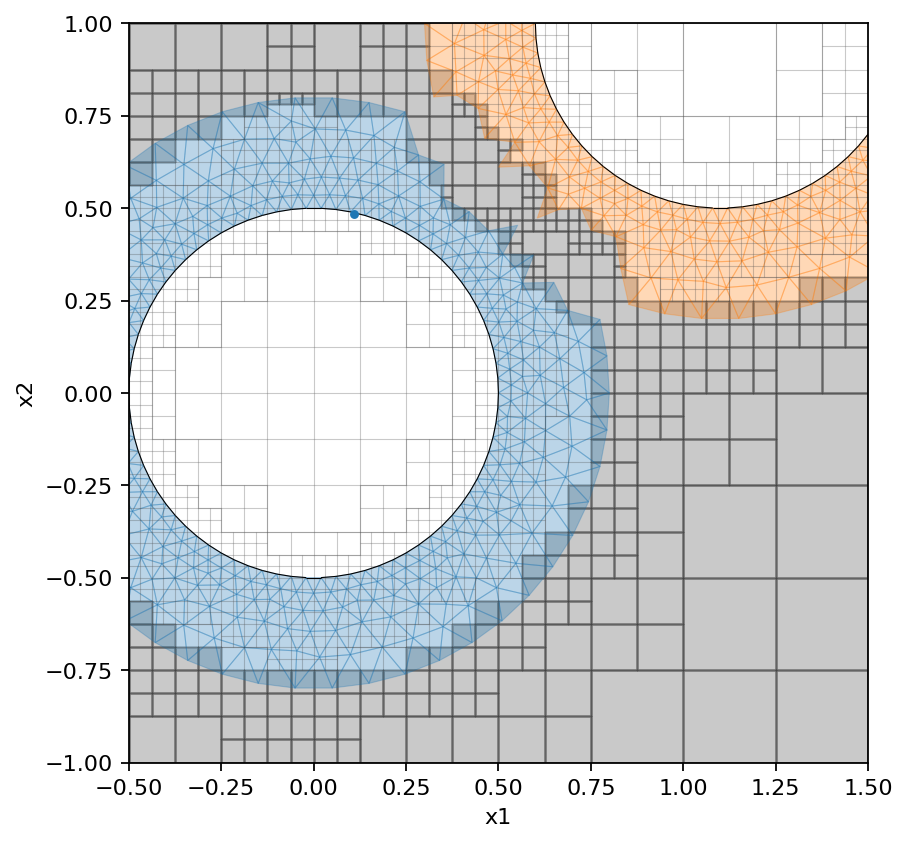

In [2]:
chimera.meshes[1].mesh.off[:] = [0.1,1]
chimera.refine_meshB()
chimera.build_cell_conn()
chimera.chimeraHole(gap=0.0)
# print(chimera.conns[0])
from chimeraTreeDemo import meshPlotUtils

fig = plt.figure(123, figsize=(6, 6),dpi=160)
ax = fig.add_subplot()
chimera.plot_holes(ax=ax)
# meshPlotUtils.plot_mesh_mono(
#     chimera.meshB,
#     ax=ax,
#     cell_mask=chimera.fluid_solid_B == -1,
# )
# mesh = chimera.meshes[0]
# mesh.mesh.plot_image(ax=ax, v=mesh.d, v_type="N")

ax.axis("tight")
xc, yc = 0.5, 0
hsee = 1
ax.set_xlim([xc - hsee, xc + hsee])
ax.set_ylim([yc - hsee, yc + hsee])
ax.set_aspect(1)

ax.plot(0.11,0.485, ".")
print(chimera.meshB.get_containing_cells([[0.11, 0.485]]))